# **Greenways.csv**

In [3]:
import pandas as pd
import numpy as np
import geopandas
import csv
import collections
import matplotlib.pyplot as plt

#shp is shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

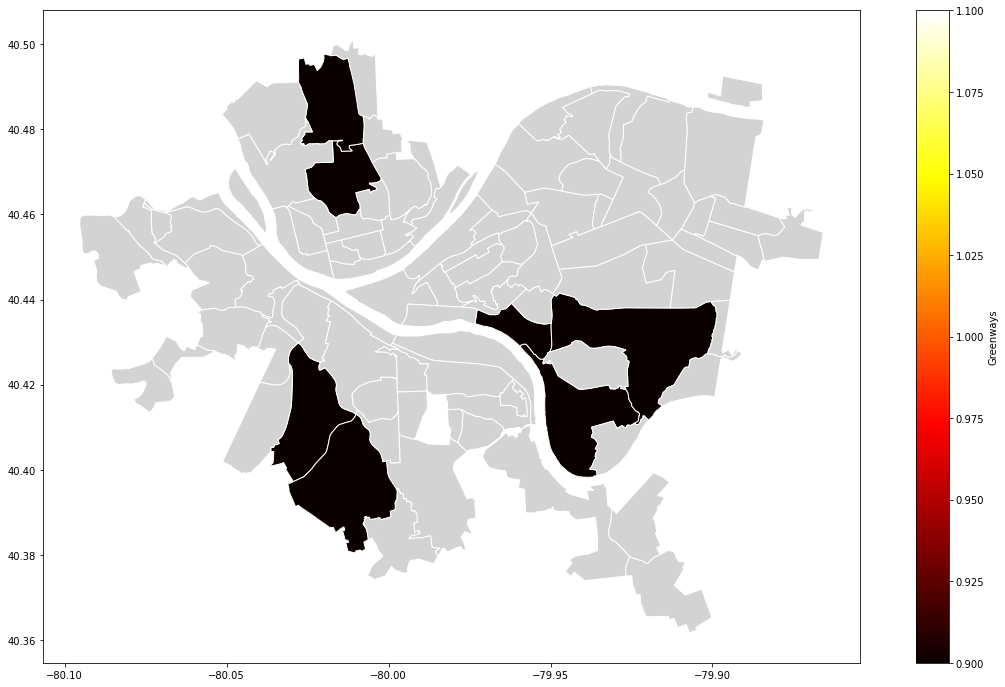

In [4]:
greenways = collections.Counter()
with open('Greenways.csv') as file:
    # Iterate over Greenways.csv
    for x in csv.reader(file, delimiter=','):
        # "neighborhood" is the 7th column
        greenways[x[9]] += 1

df1 = pd.DataFrame(greenways.most_common())
df1.columns=['Neighborhood', 'Number of Greenways']
df1.groupby("Neighborhood").sum()['Number of Greenways']

shaped1 = neighborhoods.merge(df1, how='left', left_on='hood', right_on='Neighborhood')
shaped1.plot(column='Number of Greenways',
                    cmap='hot',
                    edgecolor="white",
                    legend=True,
                    legend_kwds={'label':"Greenways"},
                    figsize=(20,12),
                    missing_kwds={"color": "lightgrey"})
# In order to set labels on geopandas graph, we have to use matplotlib
# and 'show' the axis labels
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20, bottom =False, top=False, labelbottom=False)
plt.show()

## Concluding Greenways.csv information
From this analysis, we can tell that there is obviously a much smaller amount of available data as compared to our other datasets. However, these greenways are still valuable to our analysis in that they cover large areas and provide communities with a very large greenspace. Examples of greenways in this map are Frick Park in Squirrel Hill South and Schenley Park in South Oakland.

# **Playfields.csv**

,Neighborhood,Number of Fields
0,Brighton Heights,7
1,South Side Slopes,6
2,Brookline,6
3,Squirrel Hill South,5
4,Carrick,5
5,Lower Lawrenceville,4
6,Hazelwood,4
7,Mount Washington,4
8,Highland Park,4
9,Troy Hill,3


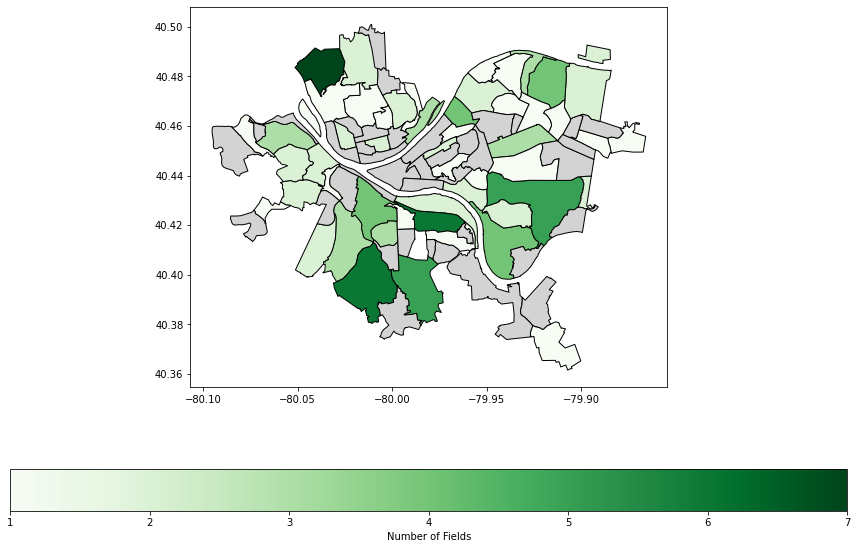

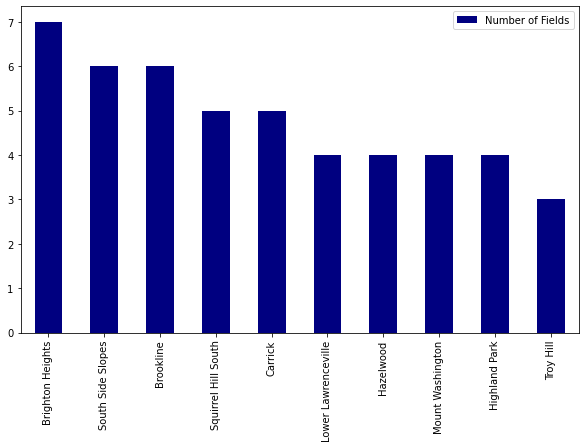

In [8]:
# Create counter object to tally number of greenways per neighborhood
fields = collections.Counter()
with open('Playfields.csv') as file:
    # Iterate over Playfields.csv
    for x in csv.reader(file,delimiter=','):
        # "neighborhood" is the 11th column of the csv
        fields[x[11]] += 1

# most_common() converted to dataframe organizes and sorts data in ascending order
df2 = pd.DataFrame(fields.most_common())
# Rename dataframe column names before grouping and visualization
df2.columns=['Neighborhood', 'Number of Fields']
df2.groupby("Neighborhood").sum()['Number of Fields']

shaped2 = neighborhoods.merge(df2, how='left', left_on='hood', right_on='Neighborhood')
shaped2.plot(column='Number of Fields',
                    cmap='Greens',
                    edgecolor="black",
                    legend=True,
                    legend_kwds={'label':"Number of Fields",
                                  'orientation': "horizontal"},
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

# .head() gets top values from DataFrame
topValues = df2.head(10)
ax = topValues.plot(kind="bar", figsize=(10,6), colormap='jet')
ax.set_xticklabels(['Brighton Heights', 'South Side Slopes', 'Brookline', 'Squirrel Hill South', 'Carrick', 'Lower Lawrenceville', 'Hazelwood', 'Mount Washington', 'Highland Park', 'Troy Hill'])
# Display topValues as table
display(topValues)

## Concluding Playfields.csv
As compared to Greenways.csv, Playfields.csv provides us with much more data to use. We can see that there are a fair amount of parks that are spread across the city, but with the most in Brighton Heights with 7, and 6 in both South Side Slopes and Brookline. Since parks are a significant variable in our analysis, this neighborhood-specific data containing their park count is very useful. With regard to community benefits, parks tend to be created around school zones or where there 
